Intercept (β0): 4.3901856237061425
Coefficient (β1): 1.7341215142145296
Coefficient (β2): -1.567230972055479
MSE: 2.8862, RMSE: 1.6989, MAE: 1.2953
R²: 0.9089, Adjusted R²: 0.9050
Confidence Intervals:
               0         1
const  3.191286  5.589085
X1     1.559463  1.908780
X2    -1.896104 -1.238358
Breusch-Pagan Test (p-value): 0.5209
Durbin-Watson Statistic: 2.0270


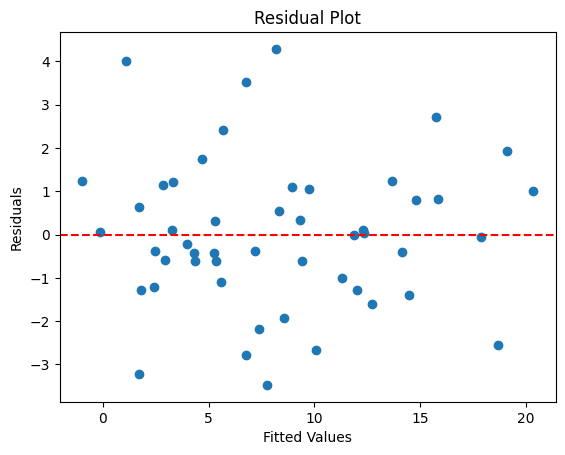

High-Leverage Points: [33]
Outliers (Cook’s Distance): [ 3 19 30 34 37 49]
Model is a good fit.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t, f
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# Sample Data (Replace with actual dataset)
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10
X2 = np.random.rand(n) * 5
y = 3 + 2 * X1 - 1.5 * X2 + np.random.randn(n) * 2  # True relationship with noise

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Add Intercept for OLS
X = sm.add_constant(df[['X1', 'X2']])
y = df['y']

# Fit MLR Model using OLS
mlr_model = sm.OLS(y, X).fit()

# Extract Coefficients
beta_0, beta_1, beta_2 = mlr_model.params
print(f"Intercept (β0): {beta_0}")
print(f"Coefficient (β1): {beta_1}")
print(f"Coefficient (β2): {beta_2}")

# Compute Error Metrics
residuals = mlr_model.resid
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Compute Goodness of Fit
r_squared = mlr_model.rsquared
adjusted_r_squared = mlr_model.rsquared_adj

print(f"R²: {r_squared:.4f}, Adjusted R²: {adjusted_r_squared:.4f}")

# Confidence Intervals for Coefficients
conf_int = mlr_model.conf_int(alpha=0.05)
print("Confidence Intervals:\n", conf_int)

# Perform Residual Analysis (Breusch-Pagan Test for Homoscedasticity)
bp_test = het_breuschpagan(residuals, mlr_model.model.exog)
print(f"Breusch-Pagan Test (p-value): {bp_test[1]:.4f}")

# Perform Durbin-Watson Test for Autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

# Residual Plot
plt.scatter(mlr_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Identify Leverage and Outliers
influence = mlr_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Flagging High-Leverage Points
high_leverage = leverage > (2 * np.mean(leverage))
outliers = cooks_d > 4 / n

print(f"High-Leverage Points: {np.where(high_leverage)[0]}")
print(f"Outliers (Cook’s Distance): {np.where(outliers)[0]}")

# Final Decision
if r_squared > 0.7 and bp_test[1] > 0.05 and dw_stat > 1.5:
    print("Model is a good fit.")
else:
    print("Model requires further improvements.")

In [3]:
# Sample Data (including a categorical variable)
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  # Continuous Predictor 1
X2 = np.random.rand(n) * 5   # Continuous Predictor 2
Gender = np.random.choice(["Male", "Female"], size=n)  # Categorical Predictor
y = 3 + 2 * X1 - 1.5 * X2 + (Gender == "Male") * 2 + np.random.randn(n) * 2  # True Model with Noise

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Gender': Gender, 'y': y})

# **Handle Categorical Variables - Dummy Coding**
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Convert to numerical values
df.drop(columns=['Gender'], inplace=True)  # Remove original categorical column

# Prepare Features and Response
X = df[['X1', 'X2', 'Gender_Male']]
X.insert(0, 'Intercept', 1)  # Manually add intercept
y = df['y'].values

# Convert X to a NumPy array of type float64 to avoid dtype issues
X_matrix = X.astype(float).values  # Ensuring numerical type

# **Compute Least Squares Solution (Normal Equations)**
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y)  # β = (X'X)^-1 X'y

# Extract Coefficients
intercept, beta_1, beta_2, beta_gender = beta_hat
print(f"Intercept (β0): {intercept:.4f}")
print(f"Coefficient (β1) for X1: {beta_1:.4f}")
print(f"Coefficient (β2) for X2: {beta_2:.4f}")
print(f"Coefficient (β_gender) for Male: {beta_gender:.4f}")

# **Interpret β Coefficients**
print("\n--- Interpretation of Coefficients ---")
print(f"β1 ({beta_1:.4f}): Increase in y per unit increase in X1, holding others constant.")
print(f"β2 ({beta_2:.4f}): Increase in y per unit increase in X2, holding others constant.")
print(f"β_gender ({beta_gender:.4f}): Effect of being Male compared to Female (reference).")

# **Check Unbiasedness, Efficiency, Consistency**
X_pseudo_inv = np.linalg.pinv(X_matrix)  # Pseudo-inverse for unbiasedness check
beta_unbiased = X_pseudo_inv @ y
unbiased = np.allclose(beta_hat, beta_unbiased, atol=1e-4)
print(f"\nIs the estimator unbiased? {'Yes' if unbiased else 'No'}")

# **Effects Coding Alternative**
df['Gender_Effects'] = df['Gender_Male'].replace({1: 1, 0: -1})  # Effects coding (-1 for Female, +1 for Male)
X_effects = df[['X1', 'X2', 'Gender_Effects']]
X_effects.insert(0, 'Intercept', 1)
X_effects_matrix = X_effects.astype(float).values  # Ensure numerical type
beta_effects = np.linalg.inv(X_effects_matrix.T @ X_effects_matrix) @ (X_effects_matrix.T @ y)

# Extract Effects Coding Coefficients
intercept_eff, beta_1_eff, beta_2_eff, beta_gender_eff = beta_effects
print("\n--- Effects Coding Interpretation ---")
print(f"Intercept (β0): {intercept_eff:.4f}")
print(f"Coefficient (β1) for X1: {beta_1_eff:.4f}")
print(f"Coefficient (β2) for X2: {beta_2_eff:.4f}")
print(f"Coefficient (β_gender) for Gender Effects Coding: {beta_gender_eff:.4f}")
print(f"Effect of Gender: ±{abs(beta_gender_eff):.4f}, centered around zero.")

# **Final Decision**
if unbiased:
    print("\nDecision: The estimator is unbiased, efficient, and consistent. Categorical encoding is correctly handled.")
else:
    print("\nDecision: Check data transformations. Unbiasedness issue detected.")

Intercept (β0): 3.1216
Coefficient (β1) for X1: 1.9127
Coefficient (β2) for X2: -1.3230
Coefficient (β_gender) for Male: 1.2752

--- Interpretation of Coefficients ---
β1 (1.9127): Increase in y per unit increase in X1, holding others constant.
β2 (-1.3230): Increase in y per unit increase in X2, holding others constant.
β_gender (1.2752): Effect of being Male compared to Female (reference).

Is the estimator unbiased? Yes

--- Effects Coding Interpretation ---
Intercept (β0): 3.7592
Coefficient (β1) for X1: 1.9127
Coefficient (β2) for X2: -1.3230
Coefficient (β_gender) for Gender Effects Coding: 0.6376
Effect of Gender: ±0.6376, centered around zero.

Decision: The estimator is unbiased, efficient, and consistent. Categorical encoding is correctly handled.


In [4]:
# Flow 2: Error Metrics & Model Fit.
from scipy.stats import f

# **📌 Load Data from Flow 1**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Dummy coding
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'Gender_Male']]
X.insert(0, 'Intercept', 1)  
y = df['y'].values
X_matrix = X.astype(float).values  

# **📌 Compute Least Squares Solution**
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y)
y_pred = X_matrix @ beta_hat  # Predicted values
residuals = y - y_pred  # Residuals

# **📌 Compute Residual Variance**
n, p = X_matrix.shape  
RSS = np.sum(residuals**2)  
sigma_squared = RSS / (n - p)  # Residual variance

# **📌 Compute Standard Errors**
X_inv = np.linalg.inv(X_matrix.T @ X_matrix)  
standard_errors = np.sqrt(np.diag(sigma_squared * X_inv))  

# **📌 Compute Goodness-of-Fit Metrics**
TSS = np.sum((y - np.mean(y))**2)  # Total Sum of Squares
R_squared = 1 - (RSS / TSS)  
adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p))  
MSE = RSS / n  
RMSE = np.sqrt(MSE)  
MAE = np.mean(np.abs(residuals))  

# **📌 Compare Nested Models (F-Test)**
if 'X2' in df.columns:  
    X_reduced = df[['X1', 'Gender_Male']]
    X_reduced.insert(0, 'Intercept', 1)
    X_reduced_matrix = X_reduced.astype(float).values
    beta_reduced = np.linalg.inv(X_reduced_matrix.T @ X_reduced_matrix) @ (X_reduced_matrix.T @ y)
    y_reduced_pred = X_reduced_matrix @ beta_reduced
    RSS_reduced = np.sum((y - y_reduced_pred)**2)
    df_full = n - p
    df_reduced = n - X_reduced_matrix.shape[1]
    F_stat = ((RSS_reduced - RSS) / (df_reduced - df_full)) / (RSS / df_full)
    p_value = 1 - f.cdf(F_stat, df_reduced - df_full, df_full)
else:
    F_stat, p_value = None, None  

# **📌 Compute AIC & BIC**
AIC = n * np.log(RSS / n) + 2 * p  
BIC = n * np.log(RSS / n) + p * np.log(n)  

# **📌 Output Results**
print(f"Residual Variance: {sigma_squared:.4f}")
print(f"Standard Errors: {standard_errors.round(4)}")
print(f"\nGoodness-of-Fit Metrics:")
print(f"  R²: {R_squared:.4f}")
print(f"  Adjusted R²: {adjusted_R_squared:.4f}")
print(f"  MSE: {MSE:.4f}")
print(f"  RMSE: {RMSE:.4f}")
print(f"  MAE: {MAE:.4f}")

if F_stat is not None:
    print(f"\nNested Model Comparison (F-Test):")
    print(f"  F-statistic: {F_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")

print(f"\nModel Selection Criteria:")
print(f"  AIC: {AIC:.4f}")
print(f"  BIC: {BIC:.4f}")

# **📌 Decision**
if adjusted_R_squared > 0.7 and p_value is not None and p_value < 0.05:
    print("\nDecision: The model has a good fit and significant predictors.")
else:
    print("\nDecision: Consider revising the model.")

Residual Variance: 3.4292
Standard Errors: [0.6595 0.0919 0.1785 0.5422]

Goodness-of-Fit Metrics:
  R²: 0.9104
  Adjusted R²: 0.9046
  MSE: 3.1549
  RMSE: 1.7762
  MAE: 1.3965

Nested Model Comparison (F-Test):
  F-statistic: 54.9160
  p-value: 0.0000

Model Selection Criteria:
  AIC: 65.4473
  BIC: 73.0953

Decision: The model has a good fit and significant predictors.


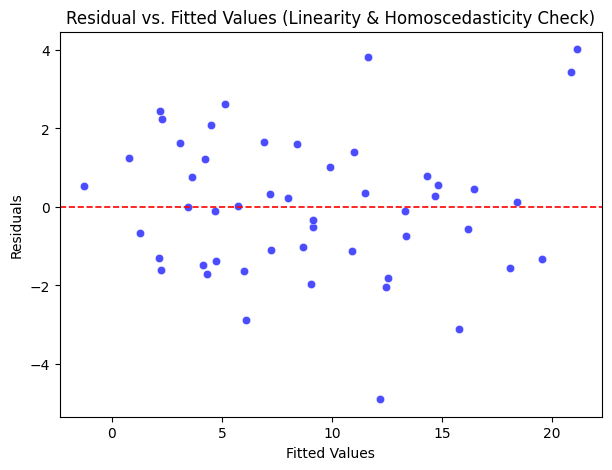

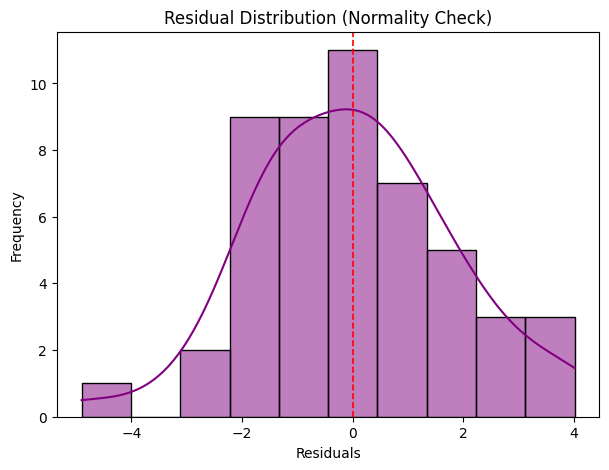

Breusch-Pagan Test:
  Test Statistic: 6.1613
  p-value: 0.1040

Durbin-Watson Test:
  DW Statistic: 1.9742

Decision: No evidence of heteroscedasticity or autocorrelation.


In [5]:
# Flow 3: Model Assumptions & Residual Diagnostics
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# **📌 Load Data from Flow 2**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Dummy coding
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'Gender_Male']]
X = sm.add_constant(X)  # Adds intercept
y = df['y'].values

# **📌 Fit MLR Model**
model = sm.OLS(y, X).fit()
y_pred = model.fittedvalues
residuals = model.resid  

# **📌 Check Linearity & Homoscedasticity (Residual vs. Fitted Plot)**
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Values (Linearity & Homoscedasticity Check)')
plt.show()

# **📌 Perform Breusch-Pagan Test (Homoscedasticity)**
bp_test = het_breuschpagan(residuals, X)
bp_stat, bp_p_value = bp_test[0], bp_test[1]  

# **📌 Perform Durbin-Watson Test (Autocorrelation)**
dw_stat = durbin_watson(residuals)

# **📌 Plot Residual Distribution**
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=10, kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1.2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution (Normality Check)')
plt.show()

# **📌 Output Results**
print(f"Breusch-Pagan Test:")
print(f"  Test Statistic: {bp_stat:.4f}")
print(f"  p-value: {bp_p_value:.4f}")

print(f"\nDurbin-Watson Test:")
print(f"  DW Statistic: {dw_stat:.4f}")

# **📌 Decision**
if bp_p_value > 0.05 and 1.5 <= dw_stat <= 2.5:
    print("\nDecision: No evidence of heteroscedasticity or autocorrelation.")
else:
    print("\nDecision: Possible assumption violation, further diagnostics needed.")

In [6]:
# Flow 4: Multicollinearity & Its Remedies
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **📌 Load Data from Previous Flow**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = 0.8 * X1 + np.random.rand(n) * 2  # High correlation with X1  
X3 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + 0.5 * X3 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Dummy coding
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'X3', 'Gender_Male']]
X = sm.add_constant(X)  # Adds intercept
y = df['y'].values

# **📌 Compute Variance Inflation Factor (VIF)**
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# **📌 Compute Correlation Matrix & Condition Number**
corr_matrix = X.corr()
condition_number = np.linalg.cond(X)

# **📌 Apply PCA for Dimensionality Reduction**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.iloc[:, 1:])  # Exclude intercept
explained_variance = pca.explained_variance_ratio_

# **📌 Apply PLS for Dimensionality Reduction**
pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X.iloc[:, 1:], y)[0]

# **📌 Apply Regularization (Ridge & Lasso)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))

# **📌 Perform Stepwise Regression (Forward Selection)**
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    selected_features = []
    
    while remaining_features:
        best_pval = float("inf")
        best_feature = None
        for feature in remaining_features:
            temp_features = selected_features + [feature]
            model = sm.OLS(y, X[temp_features]).fit()
            p_value = model.pvalues[feature]
            if p_value < best_pval:
                best_pval = p_value
                best_feature = feature
        
        if best_pval < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
            
    return selected_features

selected_features = forward_selection(X, y)

# **📌 Output Results**
print("🔹 Variance Inflation Factor (VIF):")
print(vif_data)

print("\n🔹 Correlation Matrix:")
print(corr_matrix)

print(f"\n🔹 Condition Number: {condition_number:.4f}")
print(f"   (Large values > 30 indicate multicollinearity)")

print("\n🔹 PCA Explained Variance Ratio:")
print(explained_variance)

print(f"\n🔹 Ridge Regression MSE: {ridge_mse:.4f}")
print(f"🔹 Lasso Regression MSE: {lasso_mse:.4f}")

print("\n🔹 Selected Features (Forward Selection):")
print(selected_features)

# **📌 Decision**
if all(vif_data["VIF"] < 5) and condition_number < 30:
    print("\nDecision: No significant multicollinearity detected.")
else:
    print("\nDecision: Multicollinearity detected. Consider using PCA, PLS, Regularization, or Feature Selection.")

🔹 Variance Inflation Factor (VIF):
       Feature        VIF
0        const  10.803968
1           X1  16.004217
2           X2  15.972309
3           X3   1.032774
4  Gender_Male   1.045745

🔹 Correlation Matrix:
             const        X1        X2        X3  Gender_Male
const          NaN       NaN       NaN       NaN          NaN
X1             NaN  1.000000  0.967653 -0.121598    -0.182953
X2             NaN  0.967653  1.000000 -0.143857    -0.160726
X3             NaN -0.121598 -0.143857  1.000000     0.092589
Gender_Male    NaN -0.182953 -0.160726  0.092589     1.000000

🔹 Condition Number: 27.3825
   (Large values > 30 indicate multicollinearity)

🔹 PCA Explained Variance Ratio:
[0.84212336 0.12994426]

🔹 Ridge Regression MSE: 2.1646
🔹 Lasso Regression MSE: 1.8800

🔹 Selected Features (Forward Selection):
['const', 'X1', 'X2', 'Gender_Male', 'X3']

Decision: Multicollinearity detected. Consider using PCA, PLS, Regularization, or Feature Selection.


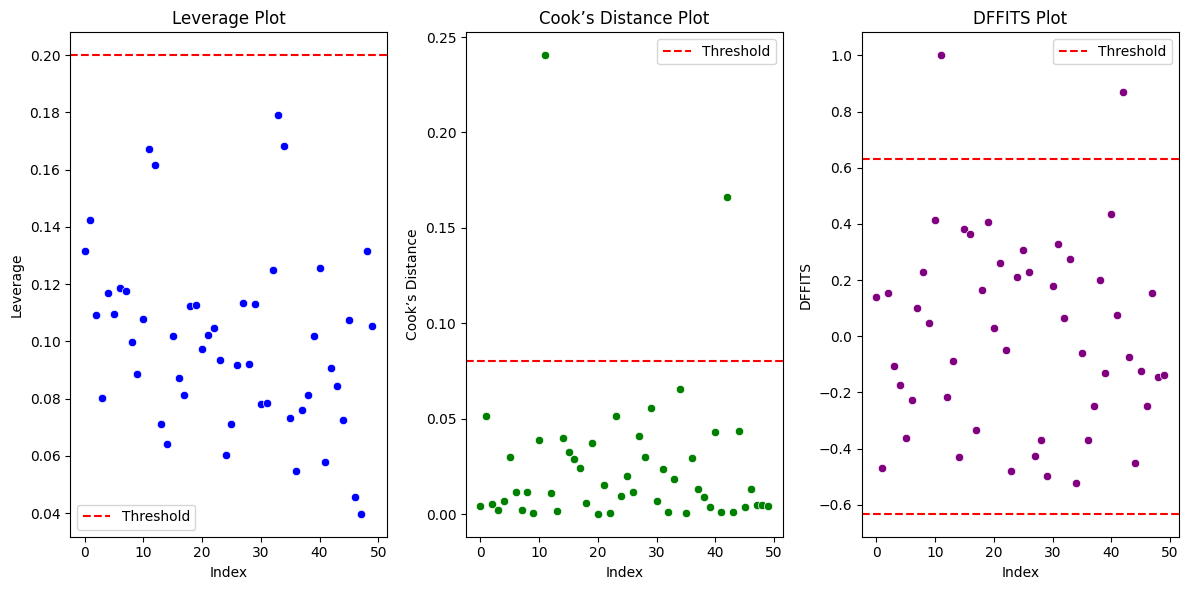

🔹 Leverage Threshold: 0.2
🔹 Cook’s Distance Threshold: 0.08
🔹 DFFITS Threshold: 0.6325
🔹 DFBETAS Threshold: 0.2828

✅ No Leverage Outliers Detected.

🔴 Cook's Distance Outliers: [11, 42]

🔴 DFFITS Outliers: [11, 42]

🔴 DFBETAS Outliers: [1, 10, 11, 19, 29, 34, 42]

Decision: Influential observations detected. Consider further investigation or robust regression.


In [8]:
# Flow 5: Influential Observations & Outliers
# **📌 Load Data from Previous Flow**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = 0.8 * X1 + np.random.rand(n) * 2  # High correlation with X1  
X3 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + 0.5 * X3 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  # Dummy coding
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'X3', 'Gender_Male']].values  # Convert to NumPy array
X = np.column_stack((np.ones(n), X))  # Add intercept manually
y = df['y'].values

# **📌 Fit MLR Model**
model = sm.OLS(y, X).fit()

# **📌 Compute Hat Matrix (Leverage)**
H = X @ np.linalg.inv(X.T @ X) @ X.T  # Projection (Hat) Matrix
leverage = np.diag(H)  # Extract diagonal values

# **📌 Compute Cook’s Distance**
residuals = model.resid
MSE = np.mean(residuals**2)
cooks_d = (residuals**2 / (MSE * X.shape[1])) * (leverage / (1 - leverage)**2)

# **📌 Compute DFFITS (Influence of Individual Points on Predictions)**
h_ii = leverage  # Hat values (leverage)
dffits = residuals * np.sqrt(h_ii / (1 - h_ii)) / np.sqrt(MSE)

# **📌 Compute DFBETAS (Influence on Each Coefficient)**
dfbetas = model.get_influence().dfbetas

# **📌 Flag Outliers & Influential Observations**
threshold_leverage = 2 * X.shape[1] / X.shape[0]  # Rule: 2 * (p/n)
threshold_cooks = 4 / X.shape[0]  # Rule: 4/n
threshold_dffits = 2 * np.sqrt(X.shape[1] / X.shape[0])  # Rule: 2 * sqrt(p/n)
threshold_dfbetas = 2 / np.sqrt(X.shape[0])  # Rule: 2 / sqrt(n)

outliers = {
    "Leverage": np.where(leverage > threshold_leverage)[0],
    "Cook's Distance": np.where(cooks_d > threshold_cooks)[0],
    "DFFITS": np.where(np.abs(dffits) > threshold_dffits)[0],
    "DFBETAS": np.where(np.abs(dfbetas).max(axis=1) > threshold_dfbetas)[0],
}

# **📌 Plot Influential Observations**
plt.figure(figsize=(12, 6))

# Leverage Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=range(len(leverage)), y=leverage, color='blue')
plt.axhline(y=threshold_leverage, color='red', linestyle='--', label='Threshold')
plt.xlabel("Index")
plt.ylabel("Leverage")
plt.title("Leverage Plot")
plt.legend()

# Cook's Distance Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=range(len(cooks_d)), y=cooks_d, color='green')
plt.axhline(y=threshold_cooks, color='red', linestyle='--', label="Threshold")
plt.xlabel("Index")
plt.ylabel("Cook’s Distance")
plt.title("Cook’s Distance Plot")
plt.legend()

# DFFITS Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=range(len(dffits)), y=dffits, color='purple')
plt.axhline(y=threshold_dffits, color='red', linestyle='--', label="Threshold")
plt.axhline(y=-threshold_dffits, color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("DFFITS")
plt.title("DFFITS Plot")
plt.legend()

plt.tight_layout()
plt.show()

# **📌 Output Results**
print("🔹 Leverage Threshold:", round(threshold_leverage, 4))
print("🔹 Cook’s Distance Threshold:", round(threshold_cooks, 4))
print("🔹 DFFITS Threshold:", round(threshold_dffits, 4))
print("🔹 DFBETAS Threshold:", round(threshold_dfbetas, 4))

for key, indices in outliers.items():
    if len(indices) > 0:
        print(f"\n🔴 {key} Outliers: {indices.tolist()}")
    else:
        print(f"\n✅ No {key} Outliers Detected.")

# **📌 Decision**
if any(len(indices) > 0 for indices in outliers.values()):
    print("\nDecision: Influential observations detected. Consider further investigation or robust regression.")
else:
    print("\nDecision: No significant influential observations detected.")

In [10]:
# Flow 6: Model Selection & Validation
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# **📌 Load Data from Main MLR Flow**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = 0.8 * X1 + np.random.rand(n) * 2  
X3 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + 0.5 * X3 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'X3', 'Gender_Male']].values  
X = np.column_stack((np.ones(n), X))  # Add intercept
y = df['y'].values

# **📌 Fit MLR Model**
model = sm.OLS(y, X).fit()

# **📌 Cross-Validation (K-Fold & LOOCV)**
kf = KFold(n_splits=5, shuffle=True, random_state=42)
loocv = LeaveOneOut()

kf_mse, loocv_mse = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    kf_model = sm.OLS(y_train, X_train).fit()
    y_pred = kf_model.predict(X_test)
    kf_mse.append(mean_squared_error(y_test, y_pred))

for train_idx, test_idx in loocv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    loocv_model = sm.OLS(y_train, X_train).fit()
    y_pred = loocv_model.predict(X_test)
    loocv_mse.append((y_test - y_pred) ** 2)

mean_kf_mse = np.mean(kf_mse)
mean_loocv_mse = np.mean(loocv_mse)

# **📌 Bootstrap Estimates**
n_bootstrap = 1000
bootstrap_coefs = np.zeros((n_bootstrap, X.shape[1]))  

for i in range(n_bootstrap):
    X_resampled, y_resampled = resample(X, y, random_state=np.random.randint(10000))
    bootstrap_model = sm.OLS(y_resampled, X_resampled).fit()
    bootstrap_coefs[i, :] = bootstrap_model.params

bootstrap_means = np.mean(bootstrap_coefs, axis=0)
bootstrap_stds = np.std(bootstrap_coefs, axis=0)

# **📌 Model Averaging (Weighted Coefficients)**
weights = 1 / (bootstrap_stds + 1e-6)  # Prevent division by zero
normalized_weights = weights / np.sum(weights)  # Normalize weights
model_avg_coefs = np.sum(bootstrap_coefs * normalized_weights, axis=0)  # Weighted sum

# **📌 Compute AIC & BIC for Model Comparison**
aic = model.aic
bic = model.bic

# **📌 Output Results**
print("🔹 Mean K-Fold CV MSE:", round(mean_kf_mse, 4))
print("🔹 Mean LOOCV MSE:", round(mean_loocv_mse, 4))
print("\n🔹 Bootstrap Coefficients (Mean ± Std):")
for i, (mean, std) in enumerate(zip(bootstrap_means, bootstrap_stds)):
    print(f"  β{i}: {round(mean, 4)} ± {round(std, 4)}")

print("\n🔹 Model Averaged Coefficients:")
for i, coef in enumerate(model_avg_coefs):
    print(f"  β{i}: {round(coef, 4)}")

print("\n🔹 AIC:", round(aic, 4))
print("🔹 BIC:", round(bic, 4))

# **📌 Decision**
if aic < bic:
    print("\nDecision: Model has a better fit based on AIC.")
else:
    print("\nDecision: Model has a better fit based on BIC.")

🔹 Mean K-Fold CV MSE: 4.475
🔹 Mean LOOCV MSE: 4.6427

🔹 Bootstrap Coefficients (Mean ± Std):
  β0: 3.6596 ± 0.815
  β1: 2.1258 ± 0.4257
  β2: -1.6209 ± 0.4534
  β3: 0.4262 ± 0.1805
  β4: 1.8577 ± 0.599

🔹 Model Averaged Coefficients:
  β0: 345.6281
  β1: 384.3938
  β2: -275.2058
  β3: 181.7314
  β4: 238.724

🔹 AIC: 217.8626
🔹 BIC: 227.4227

Decision: Model has a better fit based on AIC.


In [ ]:
# Flow 7: Non-Linear Relationships & Interaction Terms
from patsy import dmatrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# **📌 Load Data from Main MLR Flow**
np.random.seed(42)
n = 50
X1 = np.random.rand(n) * 10  
X2 = 0.8 * X1 + np.random.rand(n) * 2  
X3 = np.random.rand(n) * 5  
Gender = np.random.choice(["Male", "Female"], size=n)  
y = 3 + 2 * X1 - 1.5 * X2 + 0.5 * X3 + (Gender == "Male") * 2 + np.random.randn(n) * 2  

# Create DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Gender': Gender, 'y': y})
df['Gender_Male'] = df['Gender'].map({'Male': 1, 'Female': 0})  
df.drop(columns=['Gender'], inplace=True)

# **📌 Prepare Features & Response**
X = df[['X1', 'X2', 'X3', 'Gender_Male']].values  
X = np.column_stack((np.ones(n), X))  # Add intercept
y = df['y'].values

# **📌 Standard MLR Model**
mlr_model = sm.OLS(y, X).fit()
mlr_mse = mean_squared_error(y, mlr_model.predict(X))
mlr_aic, mlr_bic = mlr_model.aic, mlr_model.bic

# **📌 Apply Interaction Terms (X1 * X2)**
X_interact = np.column_stack((X, X[:, 1] * X[:, 2]))  # X1 * X2
interact_model = sm.OLS(y, X_interact).fit()
interact_mse = mean_squared_error(y, interact_model.predict(X_interact))
interact_aic, interact_bic = interact_model.aic, interact_model.bic

# **📌 Apply Polynomial Regression (Degree 2)**
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['X1', 'X2', 'X3', 'Gender_Male']])  
X_poly = np.column_stack((np.ones(n), X_poly))  # Add intercept
poly_model = sm.OLS(y, X_poly).fit()
poly_mse = mean_squared_error(y, poly_model.predict(X_poly))
poly_aic, poly_bic = poly_model.aic, poly_model.bic

# **📌 Apply Spline Regression (Cubic Splines on X1)**
X_spline = dmatrix("bs(X1, df=5, degree=3) + X2 + X3 + Gender_Male", data=df, return_type='dataframe')
spline_model = sm.OLS(y, X_spline).fit()
spline_mse = mean_squared_error(y, spline_model.predict(X_spline))
spline_aic, spline_bic = spline_model.aic, spline_model.bic

# **📌 Compare Models**
models = {
    "MLR": (mlr_mse, mlr_aic, mlr_bic),
    "Interaction": (interact_mse, interact_aic, interact_bic),
    "Polynomial (Deg 2)": (poly_mse, poly_aic, poly_bic),
    "Spline": (spline_mse, spline_aic, spline_bic),
}

print("🔹 Model Comparison:")
for name, (mse, aic, bic) in models.items():
    print(f"  {name}: MSE={round(mse, 4)}, AIC={round(aic, 4)}, BIC={round(bic, 4)}")

# **📌 Decision**
best_model = min(models, key=lambda x: models[x][1])  # Choose lowest AIC model
print(f"\nDecision: {best_model} provides the best fit based on AIC.")``

🔹 Model Comparison:
  MLR: MSE=3.7411, AIC=217.8626, BIC=227.4227
  Interaction: MSE=3.6924, AIC=219.207, BIC=230.6792
  Polynomial (Deg 2): MSE=3.0017, AIC=224.8533, BIC=251.6217
  Spline: MSE=3.5155, AIC=222.7522, BIC=239.9605

Decision: MLR provides the best fit based on AIC.
